In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
drugs = pd.read_csv('drug200.csv')
drugs.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

In [19]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

cols = drugs.select_dtypes(include='O').columns
for col in cols:
    drugs[col] = label_enc.fit_transform(drugs[col])

drugs

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    0   0            0   25.355     4
1     47    1   1            0   13.093     2
2     47    1   1            0   10.114     2
3     28    0   2            0    7.798     3
4     61    0   1            0   18.043     4
..   ...  ...  ..          ...      ...   ...
195   56    0   1            0   11.567     2
196   16    1   1            0   12.006     2
197   52    1   2            0    9.894     3
198   23    1   2            1   14.020     3
199   40    0   1            1   11.349     3

[200 rows x 6 columns]

In [20]:
X = drugs.drop(columns='Drug')
y = drugs['Drug']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [24]:
from sklearn.tree import DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR 
tree_clf0 = DTC()

tree_clf0.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
tree_clf0.score(X_train, y_train)


1.0

In [26]:
tree_clf0.score(X_test, y_test)

1.0

In [27]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = tree_clf0.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

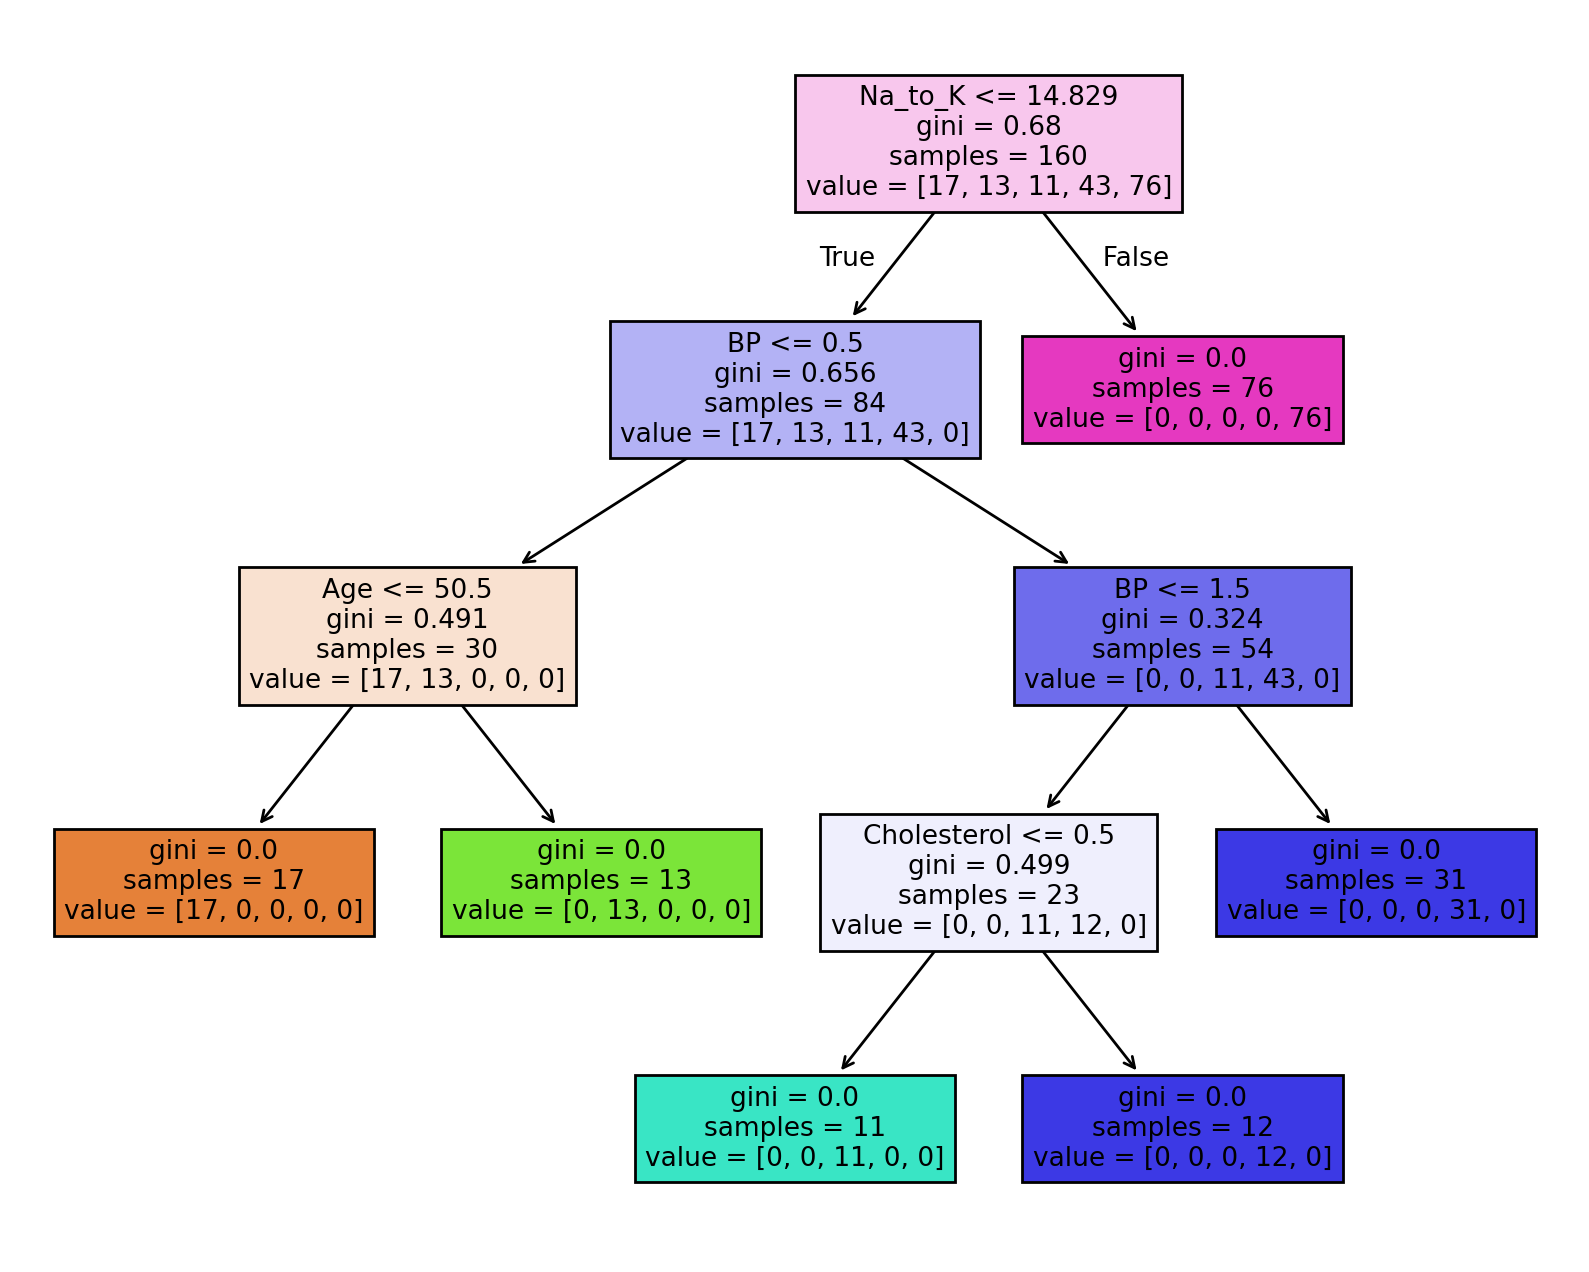

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 8), dpi=200)
plot_tree(tree_clf0, feature_names=drugs.columns, filled=True);

In [30]:
import pickle
with open('dtr_pkl2', 'wb') as files:
    pickle.dump(tree_clf0, files)

In [31]:
with open('dtr_pkl2' , 'rb') as f:
    dtr2 = pickle.load(f)

dtr2.predict(X_test)

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0])